In [22]:
import numpy as np
import pcaplot
from sklearn.decomposition import PCA

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [25]:
X = np.load('processed_data/bins_session11_b0.05.npy')

In [26]:
raw_labels = np.load('processed_data/labels11.npy')

In [27]:
cortex_areas, indexed_by_area = np.unique(raw_labels, return_inverse=True)

In [40]:
pca_model = PCA(n_components=5) # Initializes PCA
pca_model.fit(X) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
# Perform PCA
scores = pca_model.transform(X)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


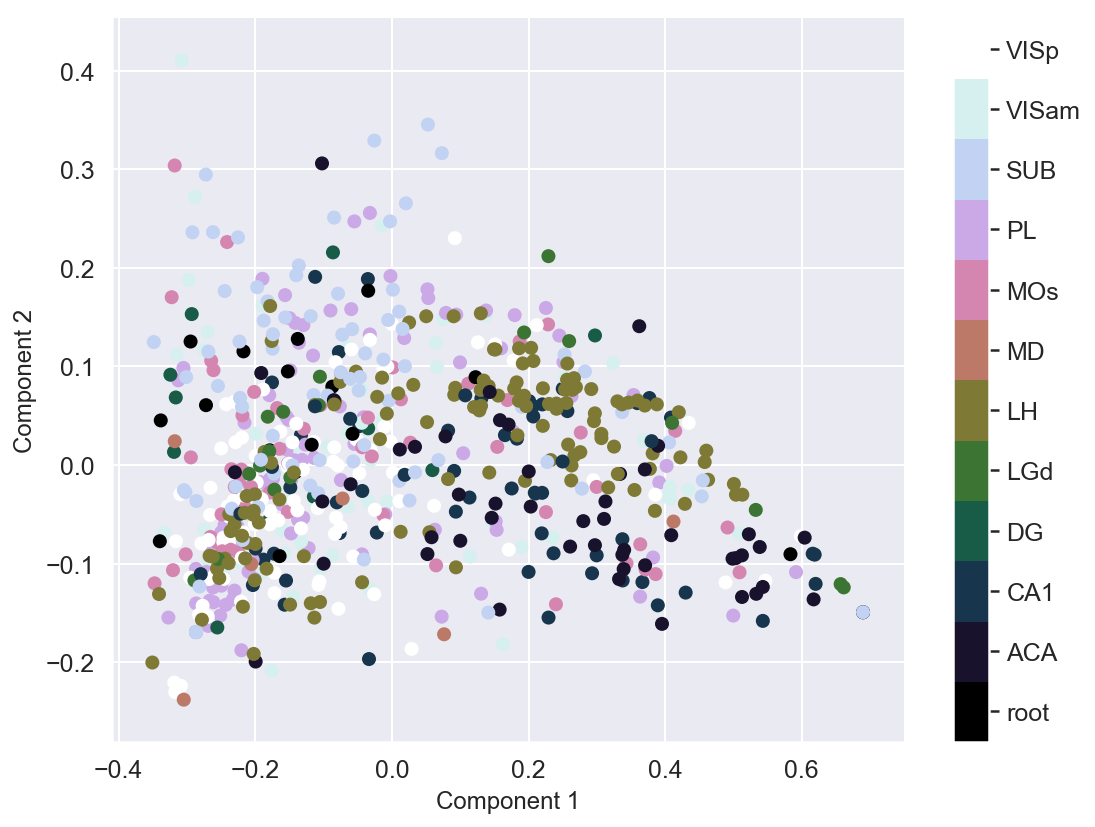

In [63]:
component1 = scores[:, 0]
component2 = scores[:, 1]

pcaplot.visualize_components(component1, component2, labels_index=indexed_by_area, labels=cortex_areas)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


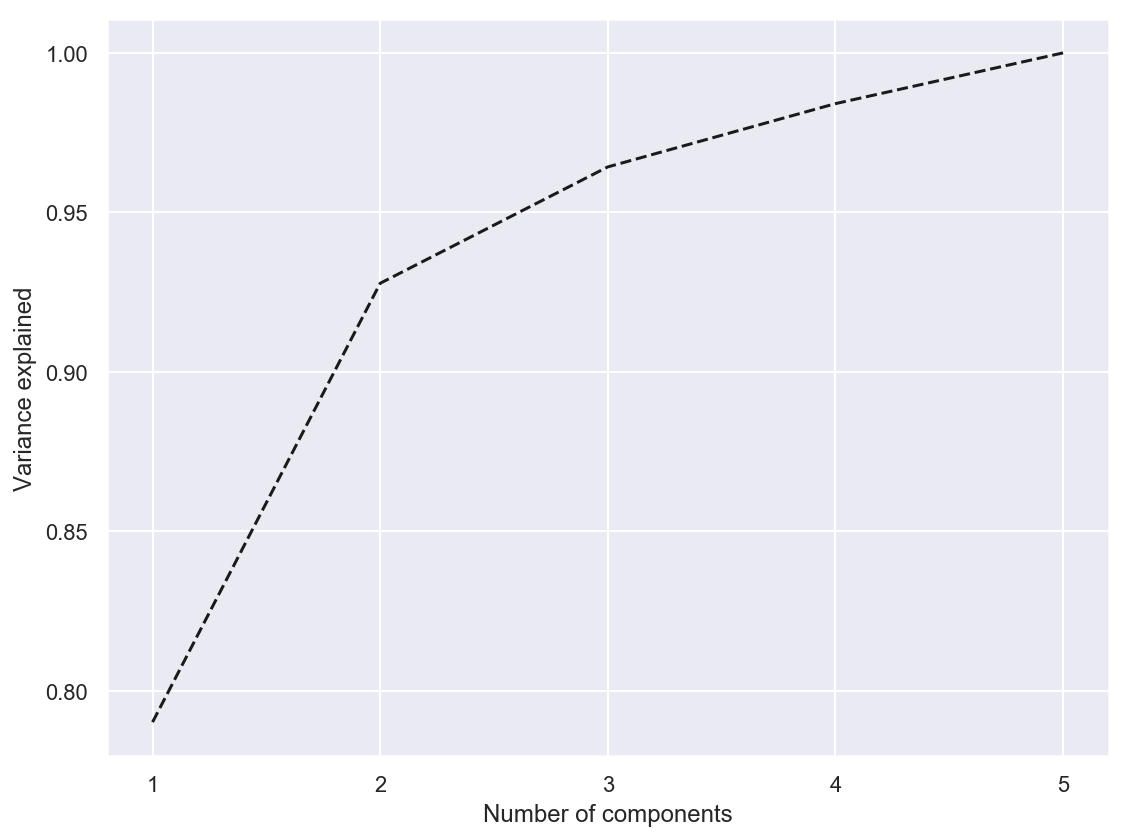

In [73]:
pcaplot.plot_variance_explained(pcaplot.get_variance_explained((pca_model.explained_variance_)))

In [31]:
cortex_areas.shape

(12,)

In [54]:
plt.gcf().set_tight_layout(False)

<Figure size 576x432 with 0 Axes>

In [67]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.71219452, 0.83625824, 0.86915529, 0.88703803, 0.90138495])

In [71]:
pcaplot.get_variance_explained((pca_model.explained_variance_ratio_))

array([0.79011139, 0.92774818, 0.96424429, 0.98408347, 1.        ])

In [72]:
pcaplot.get_variance_explained((pca_model.explained_variance_))

array([0.79011139, 0.92774818, 0.96424429, 0.98408347, 1.        ])

In [89]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=10, random_state=2020) 

In [90]:
embed = tsne_model.fit_transform(X)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


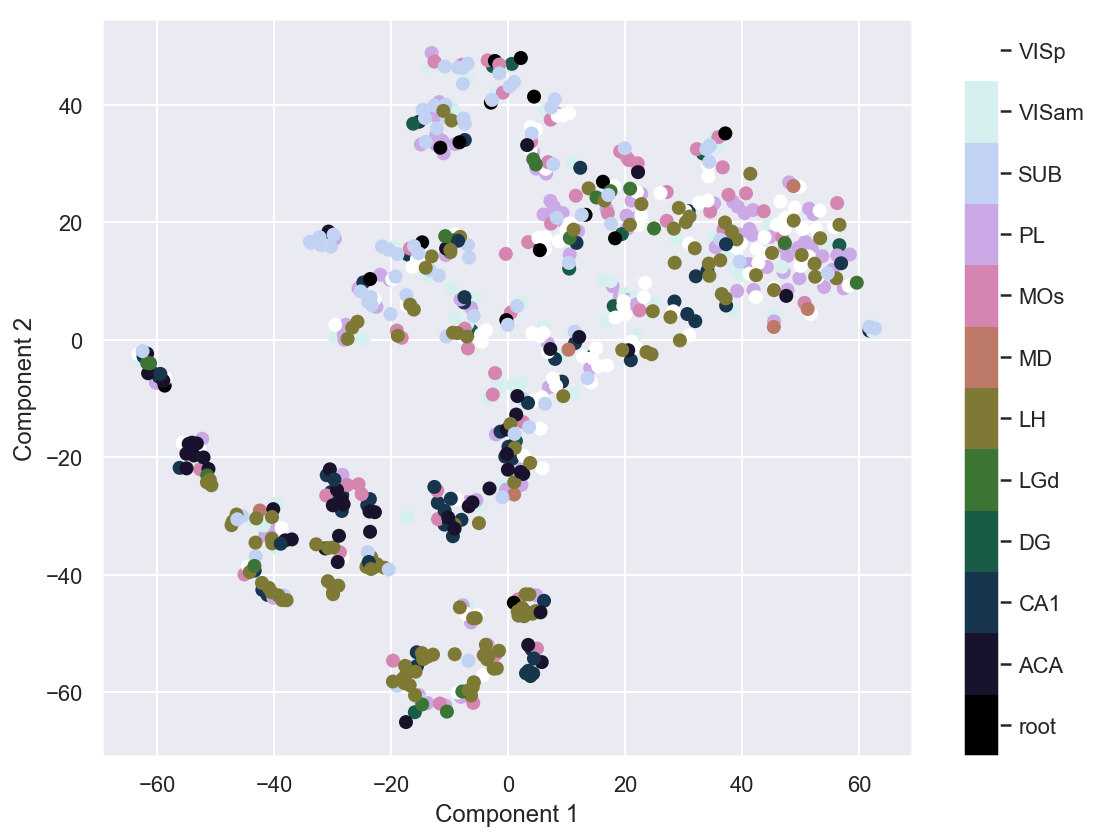

In [91]:
tsne_component1, tsne_component2 = [embed[:, 0], embed[:, 1]]
pcaplot.visualize_components(tsne_component1, tsne_component2, labels_index=indexed_by_area, labels=cortex_areas)

In [94]:
X

array([[3.15581854e-02, 2.13017751e-01, 2.56410256e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.25303393e-04],
       [2.14285714e-01, 1.14285714e-01, 8.57142857e-02, ...,
        0.00000000e+00, 0.00000000e+00, 3.11069773e-05],
       [3.88823112e-01, 2.53374378e-01, 1.04901729e-01, ...,
        2.36798484e-04, 0.00000000e+00, 1.87663950e-03],
       ...,
       [4.61538462e-01, 0.00000000e+00, 7.69230769e-02, ...,
        0.00000000e+00, 0.00000000e+00, 5.77701008e-06],
       [8.12500000e-01, 6.25000000e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.11016625e-06],
       [6.72979721e-01, 2.21180196e-01, 6.22373790e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.29725250e-03]])

In [98]:
eigen_values, eigen_vectors = np.linalg.eig(pca_model.get_covariance())

In [99]:
eigen_vectors

array([[ 9.76356257e-01+0.j, -2.00994324e-02+0.j,  1.16305957e-01+0.j,
        ...,  1.25830980e-02+0.j,  7.36148620e-03+0.j,
        -4.04023265e-03+0.j],
       [-6.42214447e-03+0.j, -8.90655662e-01+0.j, -3.81941489e-01+0.j,
        ...,  1.21752058e-02+0.j, -3.10512990e-03+0.j,
        -1.47852433e-02+0.j],
       [-1.03650314e-01+0.j, -3.77388271e-01+0.j,  7.20001520e-01+0.j,
        ...,  3.69287418e-02+0.j,  1.34379547e-02+0.j,
         6.04032622e-03+0.j],
       ...,
       [-2.54198969e-04+0.j,  5.63093709e-04+0.j, -1.91228092e-04+0.j,
        ..., -1.34477344e-01+0.j,  3.60073931e-01+0.j,
        -3.15909864e-02+0.j],
       [-4.31388594e-04+0.j,  1.48540388e-03+0.j, -1.16666762e-03+0.j,
        ..., -5.04673244e-01+0.j,  1.79742488e-01+0.j,
        -7.95849909e-02+0.j],
       [ 5.21880772e-03+0.j, -6.95749961e-03+0.j, -3.31672027e-03+0.j,
        ..., -2.16888125e-01+0.j,  5.30181690e-02+0.j,
         3.37391908e-01+0.j]])

In [103]:
eigen_vectors[0]

array([ 9.76356257e-01+0.j        , -2.00994324e-02+0.j        ,
        1.16305957e-01+0.j        , -1.14975732e-02+0.j        ,
       -1.41620848e-02+0.j        ,  4.23822190e-02+0.05908588j,
        4.23822190e-02-0.05908588j, -8.70885378e-02+0.j        ,
       -3.25307172e-02+0.j        , -6.52284130e-03+0.02672235j,
       -6.52284130e-03-0.02672235j,  1.76061923e-02+0.j        ,
        2.12446146e-02+0.j        , -1.88432371e-02+0.j        ,
        2.48835770e-02+0.j        , -1.35085391e-02+0.j        ,
       -3.72706978e-03+0.j        , -1.84482482e-02+0.j        ,
        9.78954676e-03+0.j        ,  3.81288025e-03+0.j        ,
        1.85459045e-02+0.j        ,  7.41364240e-03+0.j        ,
        5.82376020e-03+0.j        ,  2.47262042e-02+0.j        ,
       -2.17793675e-03+0.j        , -1.03742080e-02+0.j        ,
       -1.31853967e-02+0.j        , -1.56159279e-02+0.j        ,
       -7.51549607e-03+0.j        ,  7.83078935e-03+0.j        ,
       -1.16700244e-02+0.

In [102]:
X.shape

(698, 50)